# Visualizations for the criminal activity analysis of Los Angeles area

In this notebook I investigated criminal activity of Los Angeles based on publically available reports. I looked at crime distribution by category, geographical location and point in time.
Additionally I looked at similar parameters within a smaller area of West Hollywood, which was the focus of my navigaion web-app.

In [1]:
# libraries used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

In [2]:
# load processed datasets
weho_df = pd.read_csv('2018-2022.csv') #only west hollywood
la_df = pd.read_csv('2018-2022_la.csv') # all LA

#For convenience add year/hour/month/weekday as separate column in the dataframe
def add_time_intervals(df):
    df['timestamp'] = pd.to_datetime(df['INCIDENT_DATE'], format='%m/%d/%Y %I:%M:%S %p')
    df['year'] = df['timestamp'].dt.year
    df['hour'] = df['timestamp'].dt.hour
    df['month'] = df['timestamp'].dt.month
    df['weekday'] = df['timestamp'].dt.isocalendar().day
    return df #modified df

#save modified df's
weho_df = add_time_intervals(weho_df)
la_df = add_time_intervals(la_df)

In [3]:
#extracted only geo-locations of crimes into a list
crimes = list(zip(weho_df['LATITUDE'].dropna(), weho_df['LONGITUDE'].dropna()))
crimes2 = list(zip(la_df['LATITUDE'].dropna(), la_df['LONGITUDE'].dropna()))

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

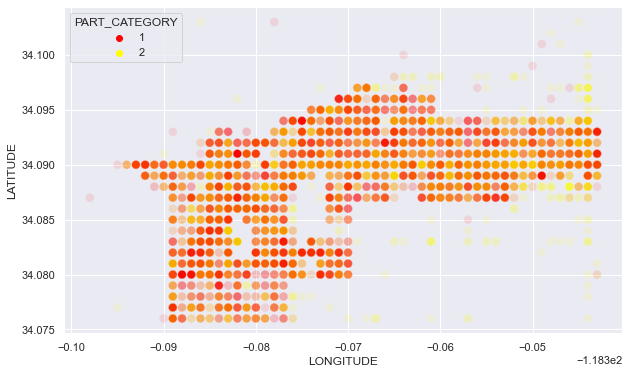

In [135]:
#plot we-ho crimes to check distribution
sns.set(rc={"figure.figsize":(10, 6)})
sns.scatterplot(data=weho_df, x='LONGITUDE', y='LATITUDE', hue='PART_CATEGORY', alpha=0.1, palette=['red', 'yellow'], s=75)

Crime data sorting may be improved since there appear points outside of West hollywood borders

In [136]:
# because plotting all 5 years of LA crime data will not be possible to plot 
# select 1 year to demonstrate unevenly reported criminal activity
la_df_2021 = la_df.query('year == 2021')
crimes_2021 = list(zip(la_df_2021['LATITUDE'].dropna(), la_df_2021['LONGITUDE'].dropna()))

#create map layout
m = folium.Map(location = [34.1, -118.4], tiles='OpenStreetMap')

#add layer with markers
for i in range(len(crimes_2021)):
    folium.CircleMarker(location=crimes_2021[i], radius=1, tooltip=crimes_2021[i]).add_to(m)

# view map
m

In [138]:
#option - build map of criminal homicide locations between 2018 and 2022

la_df_murders = la_df.query('CATEGORY == "CRIMINAL HOMICIDE"')
murders = list(zip(la_df_murders['LATITUDE'].dropna(), la_df_murders['LONGITUDE'].dropna()))

m2 = folium.Map(location = [34.1, -118.4], tiles='OpenStreetMap')

for i in range(len(murders)):
    folium.CircleMarker(location=murders[i], radius=1, tooltip=murders[i]).add_to(m2)

m2

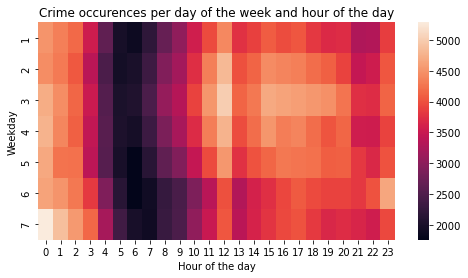

In [6]:
#Create pivot table that will count crime entried per weekday per hour
crimes_pivot = weho_df.pivot_table(values='LURN_SAK', index='weekday', columns='hour', aggfunc='count')

crimes_pivot.index = [str(x)[0:10] for x in crimes_pivot.index]
crimes_pivot.columns = [str(x)[0:10] for x in crimes_pivot.columns]

# create heatmap of crimes per weekday per hour
plt.figure(figsize=(8, 4)) # set size
sns.heatmap(crimes_pivot, 
            #annot=True, 
            fmt='') 
plt.title('Crime occurences per day of the week and hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Weekday')
plt.show() 

We can observe a strong correlation between time of the day / day of the week and total amount of crimes reported then. This suggests a cyclic nature of the criminal activities.

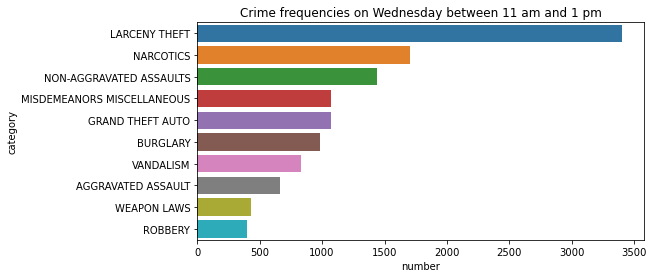

In [8]:
#Investigate most common crime occurances in the wednesday hotspot
val_cnts = weho_df.query('weekday == 3 & hour in [11,12,13]')['CATEGORY'].value_counts()
val_cnts_df = pd.DataFrame({'category': val_cnts.index, 'number':val_cnts})
plt.figure(figsize=(8, 4))
plt.title('Crime frequencies on Wednesday between 11 am and 1 pm')
sns.barplot(x=val_cnts_df['number'][:10], y=val_cnts_df['category'][:10], orient='h')
plt.show()

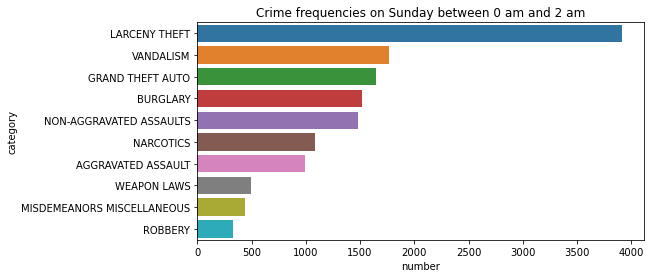

In [9]:
#investigate most common crime occurances in saturday night hotspot
val_cnts = weho_df.query('weekday == 7 & hour in [0,1,2]')['CATEGORY'].value_counts()
val_cnts_df = pd.DataFrame({'category': val_cnts.index, 'number':val_cnts})
plt.figure(figsize=(8, 4))
plt.title('Crime frequencies on Sunday between 0 am and 2 am')
sns.barplot(x=val_cnts_df['number'][:10], y=val_cnts_df['category'][:10], orient='h')
plt.show()

We can observe that the more common type of crimes vary depending on the timing. For example 2nd most common crime for wednesday noon was Narcotics related, while on Sat-Sunday night its vandalism

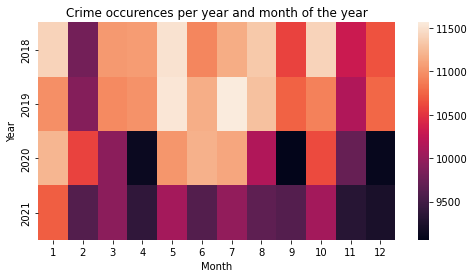

In [10]:
#plot heatmap of crime counts per year per month
df_yearly = weho_df.query('year != 2022 & year >2017') #remove incomplete year and data that ended up in 2018+ dataset by error
crimes_pivot = df_yearly.pivot_table(values='LURN_SAK', index='year', columns='month', aggfunc='count')
crimes_pivot

crimes_pivot.index = [str(x)[0:10] for x in crimes_pivot.index]
crimes_pivot.columns = [str(x)[0:10] for x in crimes_pivot.columns]


plt.figure(figsize=(8, 4)) 
sns.heatmap(crimes_pivot, 
            #annot=True, 
            fmt='') 
plt.title('Crime occurences per year and month of the year') 
plt.xlabel('Month')
plt.ylabel('Year')
plt.show() 

<AxesSubplot:xlabel='number', ylabel='category'>

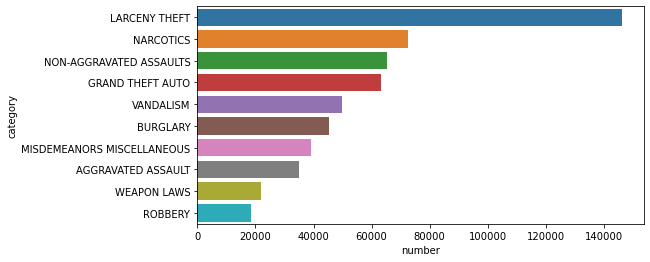

In [11]:
#Check most common crimes via histogram
#reminder - df here need to be assigned based on which dataframe (full LA or regional is used)
val_cnts = weho_df['CATEGORY'].value_counts()
val_cnts_df = pd.DataFrame({'category': val_cnts.index, 'number':val_cnts})

plt.figure(figsize=(8, 4))
sns.barplot(x=val_cnts_df['number'][:10], y=val_cnts_df['category'][:10], orient='h')

<AxesSubplot:xlabel='number', ylabel='category'>

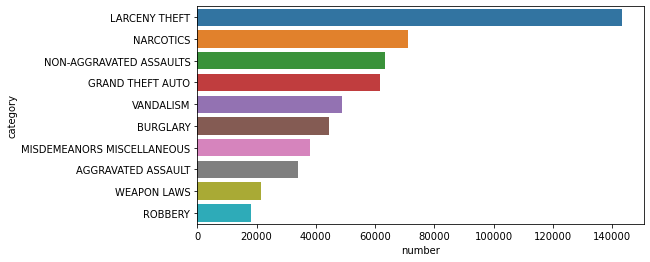

In [12]:
#Similarly check analytics in whole LA
val_cnts = la_df['CATEGORY'].value_counts()
val_cnts_df = pd.DataFrame({'category': val_cnts.index, 'number':val_cnts})
plt.figure(figsize=(8, 4))
sns.barplot(x=val_cnts_df['number'][:10], y=val_cnts_df['category'][:10], orient='h')

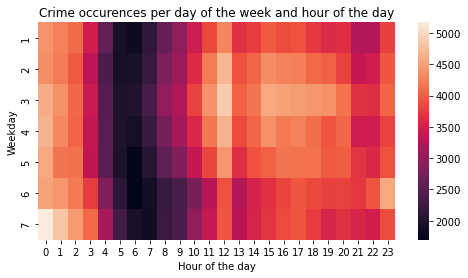

In [13]:
#heatmap for LA
crimes_pivot = la_df.pivot_table(values='LURN_SAK', index='weekday', columns='hour', aggfunc='count')

crimes_pivot.index = [str(x)[0:10] for x in crimes_pivot.index]
crimes_pivot.columns = [str(x)[0:10] for x in crimes_pivot.columns]


plt.figure(figsize=(8, 4)) 
sns.heatmap(crimes_pivot, 
            #annot=True, 
            fmt='') 
plt.title('Crime occurences per day of the week and hour of the day') 
plt.xlabel('Hour of the day')
plt.ylabel('Weekday')
plt.show() 


<AxesSubplot:xlabel='number', ylabel='category'>

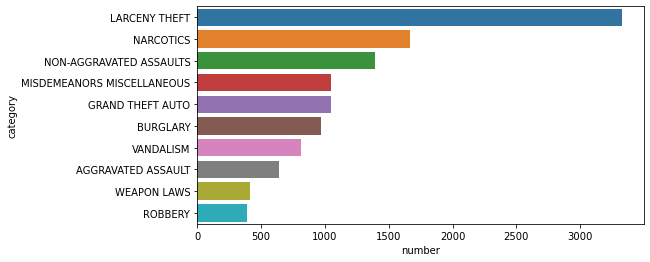

In [14]:
#wednesday hotspot crimes in LA
val_cnts = la_df.query('weekday == 3 & hour in [11,12,13]')['CATEGORY'].value_counts()
val_cnts_df = pd.DataFrame({'category': val_cnts.index, 'number':val_cnts})
plt.figure(figsize=(8, 4))

sns.barplot(x=val_cnts_df['number'][:10], y=val_cnts_df['category'][:10], orient='h')

<AxesSubplot:xlabel='number', ylabel='category'>

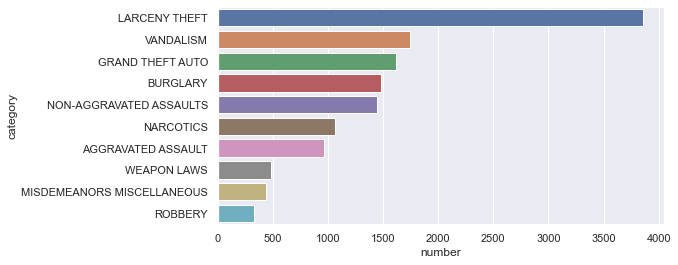

In [147]:
#saturday night hotspot
val_cnts = la_df.query('weekday == 7 & hour in [0,1,2]')['CATEGORY'].value_counts()
val_cnts_df = pd.DataFrame({'category': val_cnts.index, 'number':val_cnts})
plt.figure(figsize=(8, 4))

sns.barplot(x=val_cnts_df['number'][:10], y=val_cnts_df['category'][:10], orient='h')

<AxesSubplot:xlabel='number', ylabel='category'>

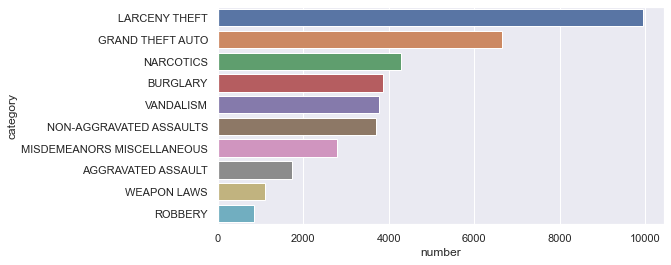

In [148]:
#crimes during the early morning "coldspots"
val_cnts = la_df.query('hour in [5,6,7]')['CATEGORY'].value_counts()
val_cnts_df = pd.DataFrame({'category': val_cnts.index, 'number':val_cnts})
plt.figure(figsize=(8, 4))

sns.barplot(x=val_cnts_df['number'][:10], y=val_cnts_df['category'][:10], orient='h')

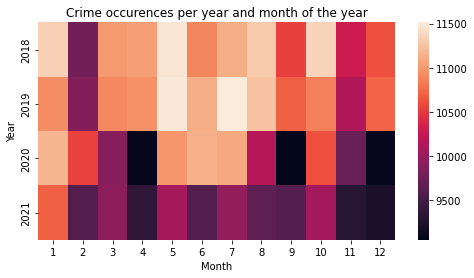

In [15]:
#year-monthly heatmap view for LA
df_yearly = la_df.query('year != 2022 & year >2017')
crimes_pivot = df_yearly.pivot_table(values='LURN_SAK', index='year', columns='month', aggfunc='count')
crimes_pivot

crimes_pivot.index = [str(x)[0:10] for x in crimes_pivot.index]
crimes_pivot.columns = [str(x)[0:10] for x in crimes_pivot.columns]


plt.figure(figsize=(8, 4)) 
sns.heatmap(crimes_pivot, 
            #annot=True, 
            fmt='') 
plt.title('Crime occurences per year and month of the year') 
plt.xlabel('Month')
plt.ylabel('Year')
plt.show() 

In [150]:
#For LA compute what % each crime category is
val_cnts = la_df['CATEGORY'].value_counts()
val_cnts_df = pd.DataFrame({'category': val_cnts.index, 'number':val_cnts})
total = val_cnts_df['number'].sum()
val_cnts_df['percent'] = val_cnts_df['number'].apply(lambda x: x/total)
val_cnts_df

,category,number,percent
LARCENY THEFT,LARCENY THEFT,143500,0.241285
NARCOTICS,NARCOTICS,70960,0.119314
NON-AGGRAVATED ASSAULTS,NON-AGGRAVATED ASSAULTS,63330,0.106485
GRAND THEFT AUTO,GRAND THEFT AUTO,61546,0.103485
VANDALISM,VANDALISM,48797,0.082049
BURGLARY,BURGLARY,44494,0.074813
MISDEMEANORS MISCELLANEOUS,MISDEMEANORS MISCELLANEOUS,37991,0.063879
AGGRAVATED ASSAULT,AGGRAVATED ASSAULT,33901,0.057002
WEAPON LAWS,WEAPON LAWS,21332,0.035868
ROBBERY,ROBBERY,18205,0.030610


In [151]:
#similarly for WeHO
val_cnts = weho_df['CATEGORY'].value_counts()
val_cnts_df = pd.DataFrame({'category': val_cnts.index, 'number':val_cnts})
total = val_cnts_df['number'].sum()
val_cnts_df['percent'] = val_cnts_df['number'].apply(lambda x: x/total)
val_cnts_df

,category,number,percent
LARCENY THEFT,LARCENY THEFT,6453,0.387010
NON-AGGRAVATED ASSAULTS,NON-AGGRAVATED ASSAULTS,1811,0.108612
VANDALISM,VANDALISM,1322,0.079285
BURGLARY,BURGLARY,1275,0.076466
NARCOTICS,NARCOTICS,1218,0.073048
MISDEMEANORS MISCELLANEOUS,MISDEMEANORS MISCELLANEOUS,1165,0.069869
GRAND THEFT AUTO,GRAND THEFT AUTO,624,0.037424
AGGRAVATED ASSAULT,AGGRAVATED ASSAULT,578,0.034665
ROBBERY,ROBBERY,556,0.033345
DRUNK / ALCOHOL / DRUGS,DRUNK / ALCOHOL / DRUGS,520,0.031186
